In [1]:
import os.path
import cv2
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity, DistanceMetric, NearestNeighbors

# Shape detection

Our task is to detect different variations of specific tetris-like shapes. We have six distinct shapes:

1. ShapeA: linear shape
2. ShapeB: L-like shape
3. ShapeC: square shape
4. ShapeD: Z-like shape
6. ShapeE: T-like shape

We also must include variations of the shapes: rotation by 90 degrees and flipping. Some shapes are fully rotation and flipping invariant, like the square shape, some are partially invariant, like the linear shape. Finally, we have to recognize the following variations of the specified shapes:

1. ShapeA: 2 variations from rotation, 0 from flipping
2. ShapeB: 4 variations from rotation, 4 from flipping
3. ShapeC: 1 variation from rotation, 0 from flipping
5. ShapeD: 4 variations from rotation, 4 from flipping
6. ShapeE: 4 variations from rotation, 4 from flipping

In total we have to recognize 15+12=27 shapes. 

## 1. Templates construction

In [7]:
template_paths = [
    'data/shape_a.jpg',
    'data/shape_b.jpg',
    'data/shape_c.jpg',
    'data/shape_d.jpg',
    'data/shape_e.jpg'
]

template_names = [
    (lambda path: os.path.splitext(os.path.basename(path)))(path)[0]
    for path in template_paths
]

templates = [
    cv2.cvtColor(
        cv2.imread(path), cv2.COLOR_BGR2RGB) 
    for path in template_paths
]

In [8]:
template_names

['shape_a', 'shape_b', 'shape_c', 'shape_d', 'shape_e']

In [64]:
# img = cv2.imread('data/test_4.jpg')
# a = cv2.imread('data/shape_a_3.jpg')

# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)


# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# a_gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

# template = a_gray

(-0.5, 369.5, 103.5, -0.5)

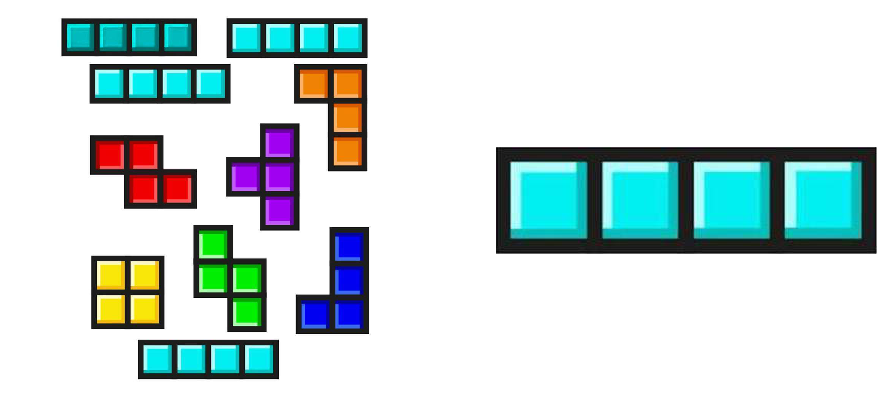

In [65]:
# plt.figure(figsize=(15,15))
# plt.subplot(1,2,1)
# plt.imshow(img)
# plt.axis('off')

# plt.subplot(1,2,2)
# plt.imshow(a)
# plt.axis('off')

In [42]:
w, h = template.shape[::-1]
rv = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
loc = np.where(rv >= 0.8)
for point in zip(*loc[::-1]):
    out = cv2.rectangle(img, point, (point[0] + w, point[1] + h), (0,0,255), 3)

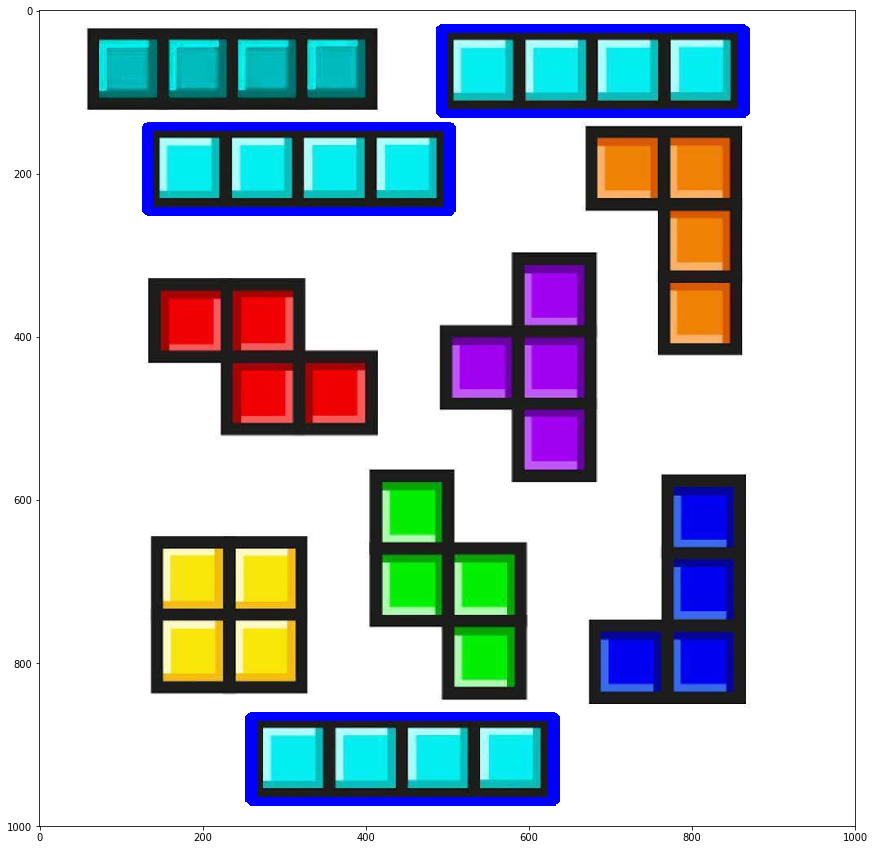

In [44]:
plt.figure(figsize=(15,15))
plt.imshow(out, cmap='gray')

In [45]:
loc

(array([ 19,  19,  19,  20,  20,  20,  20,  20,  20,  20,  21,  21,  21,
         21,  21,  21,  21,  21,  21,  22,  22,  22,  22,  22,  22,  22,
         22,  22,  22,  22,  23,  23,  23,  23,  23,  23,  23,  23,  23,
         23,  24,  24,  24,  24,  24,  24,  24,  25,  25,  25,  25, 139,
        139, 139, 140, 140, 140, 140, 140, 140, 140, 141, 141, 141, 141,
        141, 141, 141, 141, 141, 142, 142, 142, 142, 142, 142, 142, 142,
        142, 142, 142, 143, 143, 143, 143, 143, 143, 143, 143, 143, 144,
        144, 144, 144, 144, 144, 144, 145, 145, 145, 145, 862, 862, 862,
        863, 863, 863, 863, 863, 863, 863, 864, 864, 864, 864, 864, 864,
        864, 864, 864, 865, 865, 865, 865, 865, 865, 865, 865, 865, 865,
        865, 866, 866, 866, 866, 866, 866, 866, 866, 866, 866, 867, 867,
        867, 867, 867, 867, 867, 868, 868, 868, 868]),
 array([492, 493, 494, 490, 491, 492, 493, 494, 495, 496, 489, 490, 491,
        492, 493, 494, 495, 496, 497, 488, 489, 490, 491, 492, 493, 4

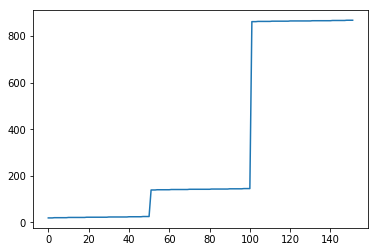

In [46]:
plt.plot(list(range(len(loc[0]))), loc[0])

(array([51.,  0., 50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0., 51.]),
 array([ 19.  ,  61.45, 103.9 , 146.35, 188.8 , 231.25, 273.7 , 316.15,
        358.6 , 401.05, 443.5 , 485.95, 528.4 , 570.85, 613.3 , 655.75,
        698.2 , 740.65, 783.1 , 825.55, 868.  ]),
 <a list of 20 Patch objects>)

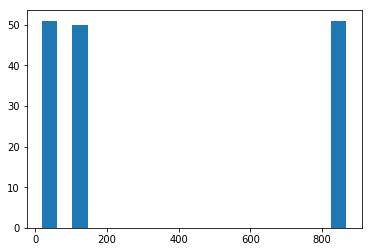

In [47]:
plt.hist(loc[0], 20)

In [13]:
kde = KernelDensity(kernel='tophat', bandwidth=0.2).fit(loc)

In [14]:
kde.score_samples(loc)

array([254.49245157, 254.49245157])

In [15]:
loc

(array([ 19,  19,  19,  20,  20,  20,  20,  20,  20,  20,  21,  21,  21,
         21,  21,  21,  21,  21,  21,  22,  22,  22,  22,  22,  22,  22,
         22,  22,  22,  22,  23,  23,  23,  23,  23,  23,  23,  23,  23,
         23,  24,  24,  24,  24,  24,  24,  24,  25,  25,  25,  25, 139,
        139, 139, 140, 140, 140, 140, 140, 140, 140, 141, 141, 141, 141,
        141, 141, 141, 141, 141, 142, 142, 142, 142, 142, 142, 142, 142,
        142, 142, 142, 143, 143, 143, 143, 143, 143, 143, 143, 143, 144,
        144, 144, 144, 144, 144, 144, 145, 145, 145, 145]),
 array([492, 493, 494, 490, 491, 492, 493, 494, 495, 496, 489, 490, 491,
        492, 493, 494, 495, 496, 497, 488, 489, 490, 491, 492, 493, 494,
        495, 496, 497, 498, 489, 490, 491, 492, 493, 494, 495, 496, 497,
        498, 490, 491, 492, 493, 494, 495, 496, 492, 493, 494, 495, 132,
        133, 134, 130, 131, 132, 133, 134, 135, 136, 129, 130, 131, 132,
        133, 134, 135, 136, 137, 128, 129, 130, 131, 132, 133, 1

In [16]:
loc[0].mean()

81.47524752475248

In [17]:
loc[0].std()

60.01049315165697

In [18]:
loc[0].var()

3601.259288305069

In [48]:
threshold = 10
clusters = 1
for i in range(len(loc[0])-1):
    if (loc[0][i+1]-loc[0][i]) > threshold:
        clusters += 1
    

In [49]:
clusters

3

In [21]:
neig = NearestNeighbors(n_neighbors=2).fit(loc)

In [22]:
neig.kneighbors(loc)

(array([[   0.        , 3364.76433053],
        [   0.        , 3364.76433053]]), array([[0, 1],
        [1, 0]]))

In [23]:
neig.kneighbors_graph(loc).toarray()

array([[1., 1.],
       [1., 1.]])

In [30]:
a

array([[[ 69,  69,  69],
        [ 54,  54,  54],
        [ 71,  71,  71],
        ...,
        [ 64,  64,  64],
        [ 34,  34,  34],
        [151, 151, 151]],

       [[ 14,  14,  14],
        [  2,   2,   2],
        [ 24,  24,  24],
        ...,
        [ 11,   9,  10],
        [  4,   4,   4],
        [121, 121, 121]],

       [[ 15,  15,  15],
        [  6,   6,   6],
        [ 32,  32,  32],
        ...,
        [ 37,  28,  31],
        [ 11,  11,  11],
        [128, 128, 128]],

       ...,

       [[ 12,  12,  12],
        [  7,   7,   7],
        [  9,   9,   9],
        ...,
        [ 16,  16,  16],
        [ 13,  13,  13],
        [112, 112, 112]],

       [[ 26,  26,  26],
        [ 19,  19,  19],
        [ 16,  16,  16],
        ...,
        [ 16,  16,  16],
        [ 20,  20,  20],
        [118, 118, 118]],

       [[104, 104, 104],
        [ 97,  97,  97],
        [ 95,  95,  95],
        ...,
        [ 97,  97,  97],
        [ 82,  82,  82],
        [179, 179, 179]]

In [35]:
img


array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0

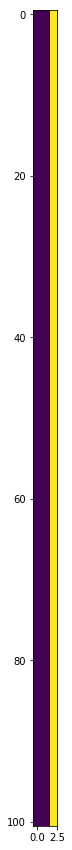

In [36]:
plt.figure(figsize=(15,15))
plt.imshow(img[loc])

In [62]:
noise_idxs = random.randint(0,255, (500,500))
img_noisy = img.copy()
img_noisy[noise_idxs] = img[noise_idxs][0] - 50

In [58]:
img.shape

(1000, 1000, 3)

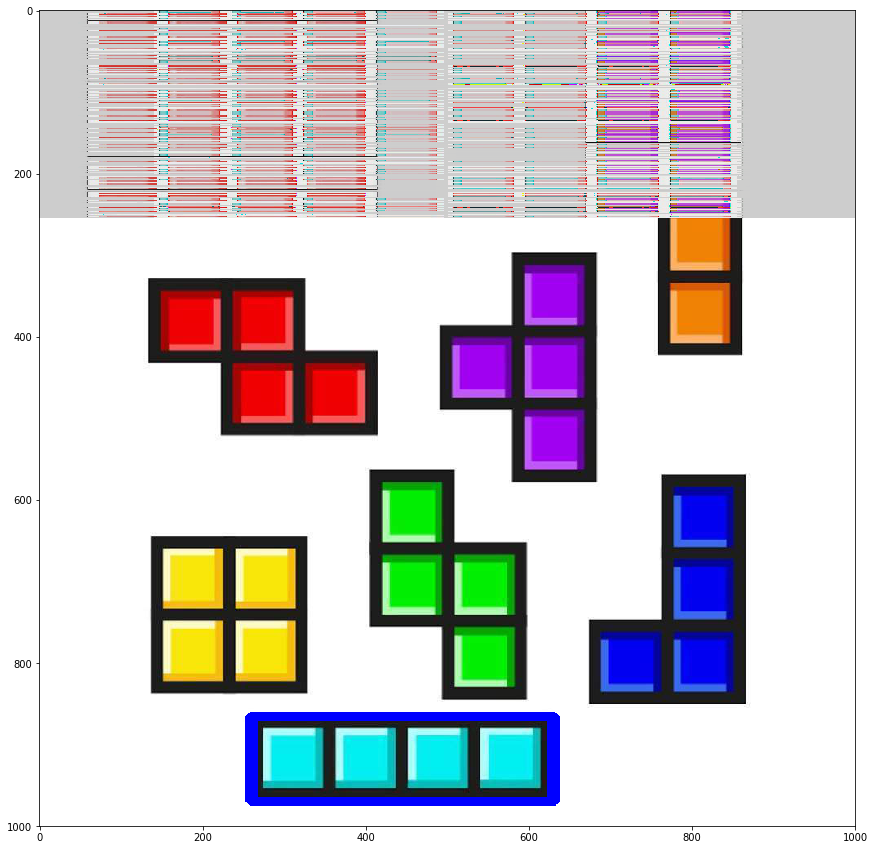

In [63]:
plt.figure(figsize=(15,15))
plt.imshow(img)